## Extraction of zip files

In [ ]:
path=r'C:\Users\Lenovo\Downloads\mnist.zip'

In [2]:
from zipfile import ZipFile
with ZipFile(path, 'r') as zipObj:
#      #Extract all the contents of zip file in current directory
     zipObj.extractall(r'E:\cv_images')

In [3]:
#import necessary libraries
import os
from PIL import Image
import pandas as pd
import numpy as np

## Image Preprocessing

In [4]:
def load_mnist_data(datafolder):
    data = []
    labels = []

    for root, _, files in os.walk(datafolder):
        for file in files:
            if file.endswith(".png"):
                image_path = os.path.join(root, file)
                try:
                    with Image.open(image_path) as image:
                        # Convert the image to grayscale and then to a numpy array
                        img_array = np.array(image.convert('L'), dtype='uint8')
                        flattened_img = img_array.ravel()
                        data.append(flattened_img)
                    label = os.path.basename(os.path.dirname(image_path))
                    labels.append(label)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

    return data, labels
                                  
target_path = r'E:\cv_images'
data, labels = load_mnist_data(target_path)

#Create a new dataframe with columns based on the number of pixels in the flattened image
pixelsdf = pd.DataFrame(data, columns=[f'pixel{i}' for i in range(len(data[0]))])

#Create the final dataframe with the 'Label' column
mnist_df = pd.concat([pixelsdf, pd.Series(labels, name='Label')], axis=1)

#Display the vectorized image dataframe
mnist_df.head()
#Get the columns with non-zero values (excluding the 'Label' column)
non_zero_columns = mnist_df.drop('Label', axis=1).columns[mnist_df.drop('Label', axis=1).any()]

#Display the columns with non-zero values
print(non_zero_columns)

Index(['pixel20', 'pixel21', 'pixel22', 'pixel31', 'pixel32', 'pixel33',
       'pixel34', 'pixel35', 'pixel36', 'pixel37',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=710)


In [6]:
mnist_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [5]:
mnist_df.shape

(372451, 785)

In [7]:
mnist_df.to_csv('alphabet_images.csv')

In [9]:
mnist_df.Label.value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: Label, dtype: int64

In [10]:
import seaborn as sns

<Axes: xlabel='Label', ylabel='count'>

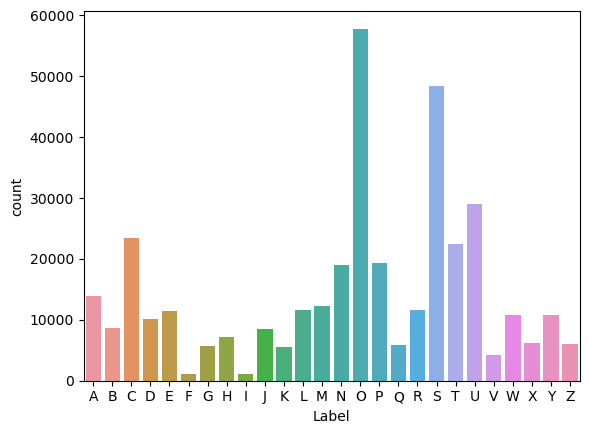

In [13]:
sns.countplot(data=mnist_df, x='Label')

In [14]:
#input variables
X = mnist_df.drop('Label', axis=1)

#output variable
y = mnist_df['Label']

## Train-Test-Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

##  Model Training & Evaluation

## KNN Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
#prediction
y_test_pred = knn_model.predict(X_test)

In [18]:
import sys
import time
from sklearn.metrics import accuracy_score

In [19]:
knn_model_size = sys.getsizeof(knn_model)
print("The size of the knn_model is: ",knn_model_size,"Bytes")

The size of the knn_model is:  48 Bytes


In [35]:
# evaluation
knn_model_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of knn classifier model is: ",knn_model_accuracy)

Accuracy of knn classifier model is:  0.9586953486623779


## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# Capture the start time
start_time = time.time()
# prediction
y_test_pred = lr_model.predict(X_test)
# Capture the end time
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print(f"Prediction time: {prediction_time:.6f} seconds")

Prediction time: 0.671244 seconds


In [23]:
lr_model_size = sys.getsizeof(lr_model)
print("The size of the lr_model is: ",lr_model_size,"Bytes")

The size of the lr_model is:  48 Bytes


In [37]:
lr_model_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of logistic regression classifier model is: ",lr_model_accuracy)

Accuracy of logistic regression classifier model is:  0.8764511937108674


## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
# Capture the start time
start_time = time.time()
# prediction
y_test_pred = dt_classifier.predict(X_test)
# Capture the end time
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print(f"Prediction time: {prediction_time:.6f} seconds")

Prediction time: 0.233204 seconds


In [28]:
dt_classifier_size = sys.getsizeof(dt_classifier)
print("The size of the dt_classifier is: ",dt_classifier_size,"Bytes")

The size of the dt_classifier is:  48 Bytes


In [39]:
dt_classifier_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of decision tree classifier model is: ",dt_classifier_accuracy)

Accuracy of decision tree classifier model is:  0.9482993781749057


## Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier =RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
# Capture the start time
start_time = time.time()
# prediction
y_test_pred = rf_classifier.predict(X_test)
# Capture the end time
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print(f"Prediction time: {prediction_time:.6f} seconds")

Prediction time: 8.903592 seconds


In [32]:
rf_classifier_size = sys.getsizeof(rf_classifier)
print("The size of the rf_classifier is: ",rf_classifier_size,"Bytes")

The size of the rf_classifier is:  48 Bytes


In [41]:
rf_classifier_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of random forest classifier model is: ",rf_classifier_accuracy)

Accuracy of random forest classifier model is:  0.9864036171103927


## Comparision of accuracies of the models

In [43]:
models = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [knn_model_accuracy,lr_model_accuracy,dt_classifier_accuracy,rf_classifier_accuracy]
data = {'Model Name': models, 'Accuracy': accuracies}
model_df = pd.DataFrame(data)

# Multiply the accuracies by 100
model_df['Accuracy'] = model_df['Accuracy'] * 100
model_df.head()

,Model Name,Accuracy
0,KNN,95.869535
1,Logistic Regression,87.645119
2,Decision Tree,94.829938
3,Random Forest,98.640362


In [45]:
import matplotlib.pyplot as plt

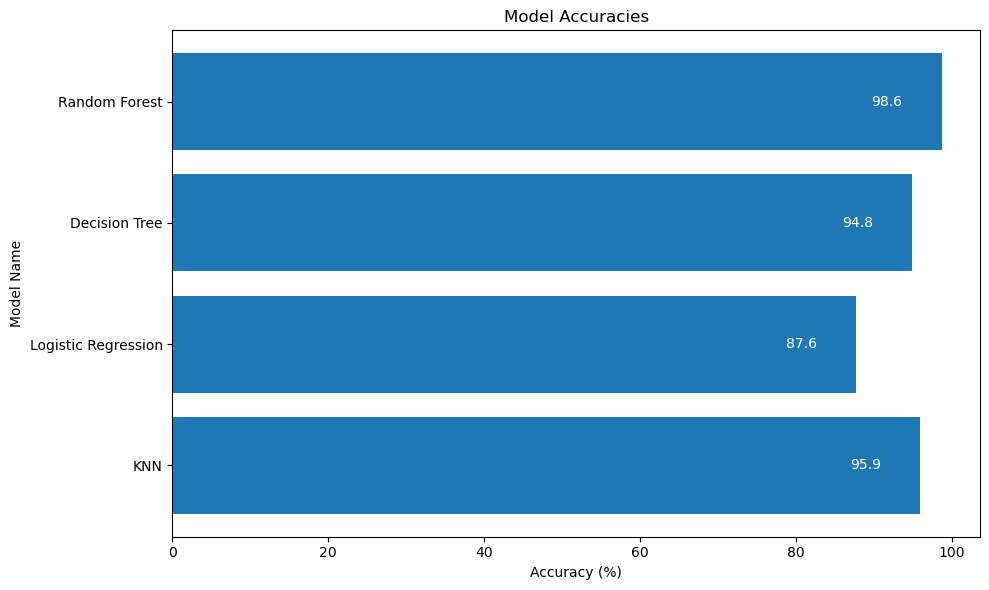

In [47]:
# Create the bar plot
plt.figure(figsize=(10, 6))
bars=plt.barh(model_df['Model Name'], model_df['Accuracy'])
plt.ylabel('Model Name')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracies')

for bar in bars:
    width = bar.get_width()
    plt.gca().text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2,
                   f'{width:.1f}', ha='right', va='center', color='white')
plt.tight_layout()

# Show the plot
plt.show()

## Conclusion

Decision tree model is the best suitable model with less latency and good accuracy and is light for deployment.Even though the accuracy of Random Forest model and the KNN model is higher compared to the Decision Tree model their prediction time is quite higher than the Decion Tree model.Hence the Decision Tree is most suitable model for the classification of the handwritten alphabets.